In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('img1.jpg')
img1 = cv2.imread('rov_pool.jpg')

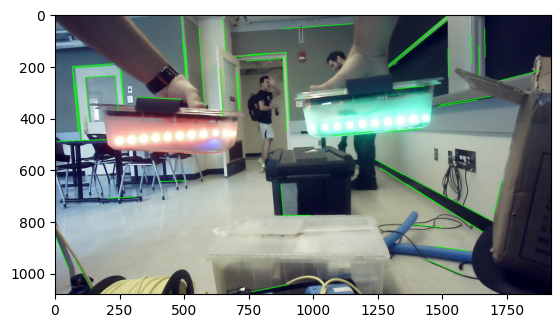

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 90, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

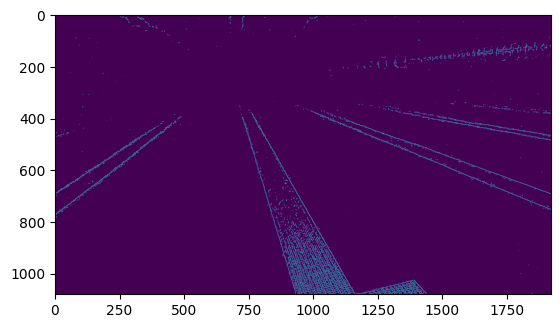

In [5]:
poolimg = img1.copy()
grayPool = cv2.cvtColor(poolimg, cv2.COLOR_BGR2GRAY)
poolEdges = cv2.Canny(grayPool, 300, 308, apertureSize=5)
plt.imshow(poolEdges)


0.5765199161425576
2.7524752475247523
2.4685314685314683
0.3055555555555556


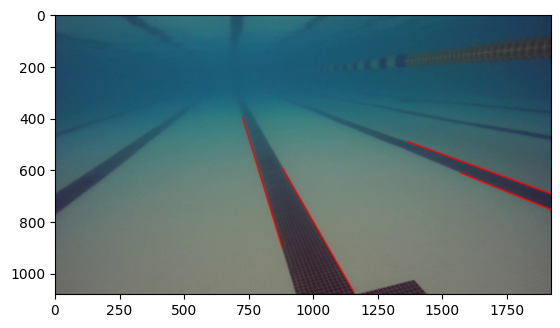

In [6]:
poolLines = cv2.HoughLinesP(
                poolEdges, 
                1,
                np.pi/180,
                290,
                minLineLength = 300,
                maxLineGap = 20
        )
for poolline in poolLines:
    x1, y1, x2, y2 = poolline[0]
    cv2.line(poolimg, (x1, y1),(x2, y2), (0, 0, 255), 3)
    
    print( (x1 - x2) / (y1 - y2))
plt.imshow(cv2.cvtColor(poolimg, cv2.COLOR_BGR2RGB))


In [7]:
def addLines(poolimg):
    grayPool = cv2.cvtColor(poolimg, cv2.COLOR_BGR2GRAY)
    poolEdges = cv2.Canny(grayPool, 295, 308, apertureSize=5)

    poolLines = cv2.HoughLinesP(
                poolEdges, 
                1,
                np.pi/180,
                255,
                minLineLength = 300,
                maxLineGap = 20
        )
    slope = [] 

    for poolline in poolLines:
        x1, y1, x2, y2 = poolline[0]
        cv2.line(poolimg, (x1, y1),(x2, y2), (0, 0, 255), 3)
        slope.append((x1 - x2) / (y1 - y2))
    plt.imshow(poolimg)
    return slope
    




[2.36144578313253, 2.7372262773722627]

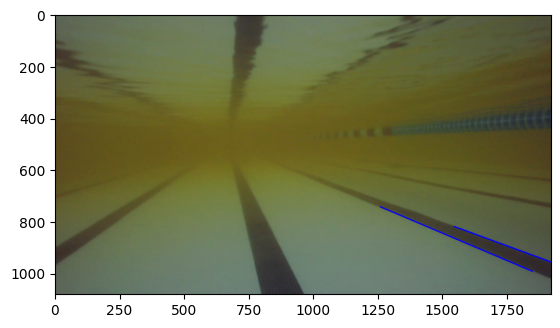

In [18]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()
addLines(frame)

[2.4634146341463414, 2.756218905472637, 2.4873417721518987]

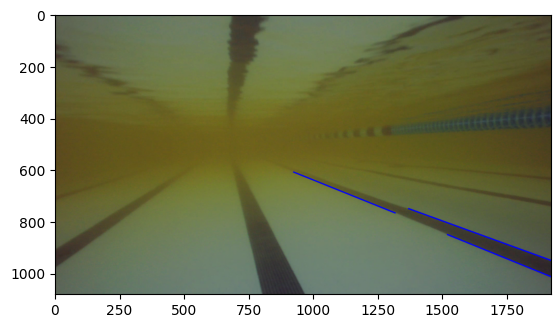

In [17]:
ret, frame = cap.read()
addLines(frame)

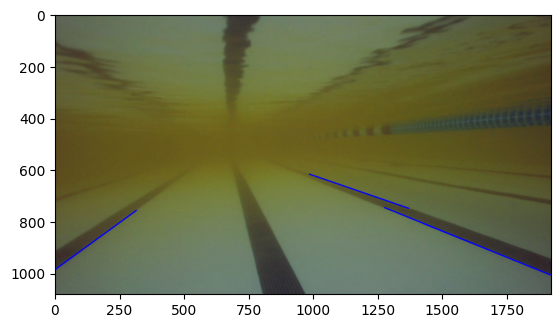

In [20]:
# i = 1
while True:
    ret, frame = cap.read()
    try:
        addLines(frame)
    except:
        print("No lines found!")
    # i += 1
    # if i >= 10: break